In [1]:
import pandas as pd 
import numpy as np
import sqlite3
import networkx as nx
from pyvis.network import Network 
import matplotlib.pyplot as plt
import random 
from matplotlib import pyplot as plt, colors

In [2]:
#laod all the dataset 
Node = pd.read_csv('Node_info.csv')
Edge = pd.read_csv('Edge_info.csv')
dat2 = pd.read_csv('Song_attribute.csv')
artist = pd.read_csv("cleaned_artist.csv")
edweight = Edge['edge_weight'].tolist()
Edge.head()

,edge,edge_weight
0,"('Wale', 'Big Sean')",2.0
1,"('2 Chainz', 'Big Sean')",5.0
2,"('Rick Ross', 'Big Sean')",3.0
3,"('Young Money', 'Big Sean')",0.0
4,"('ScHoolboy Q', 'Big Sean')",0.0


In [3]:
#extrac the data needed 
Nodes = Node['node'].tolist()
Node_size = Node['node_size'].tolist()
Node_color = Node['node_color'].tolist()

#have the edges:
Edges = []
Edge_weights = []
for index, rows in artist.iterrows():
    #make iterable 
    temp =(rows.artist, rows.related_to)
    #check if both nodes are inside the nodes list 
    if temp[0] in Nodes and temp[1] in Nodes:
      Edges.append(temp)
      Edge_weights.append(rows.collaborations)
        

In [4]:
#have a different edge set for interactive plot 
iEdges = []
for i in range(len(Edges)):
    temp = (Edges[i][0],Edges[i][1],edweight[i])
    iEdges.append(temp)

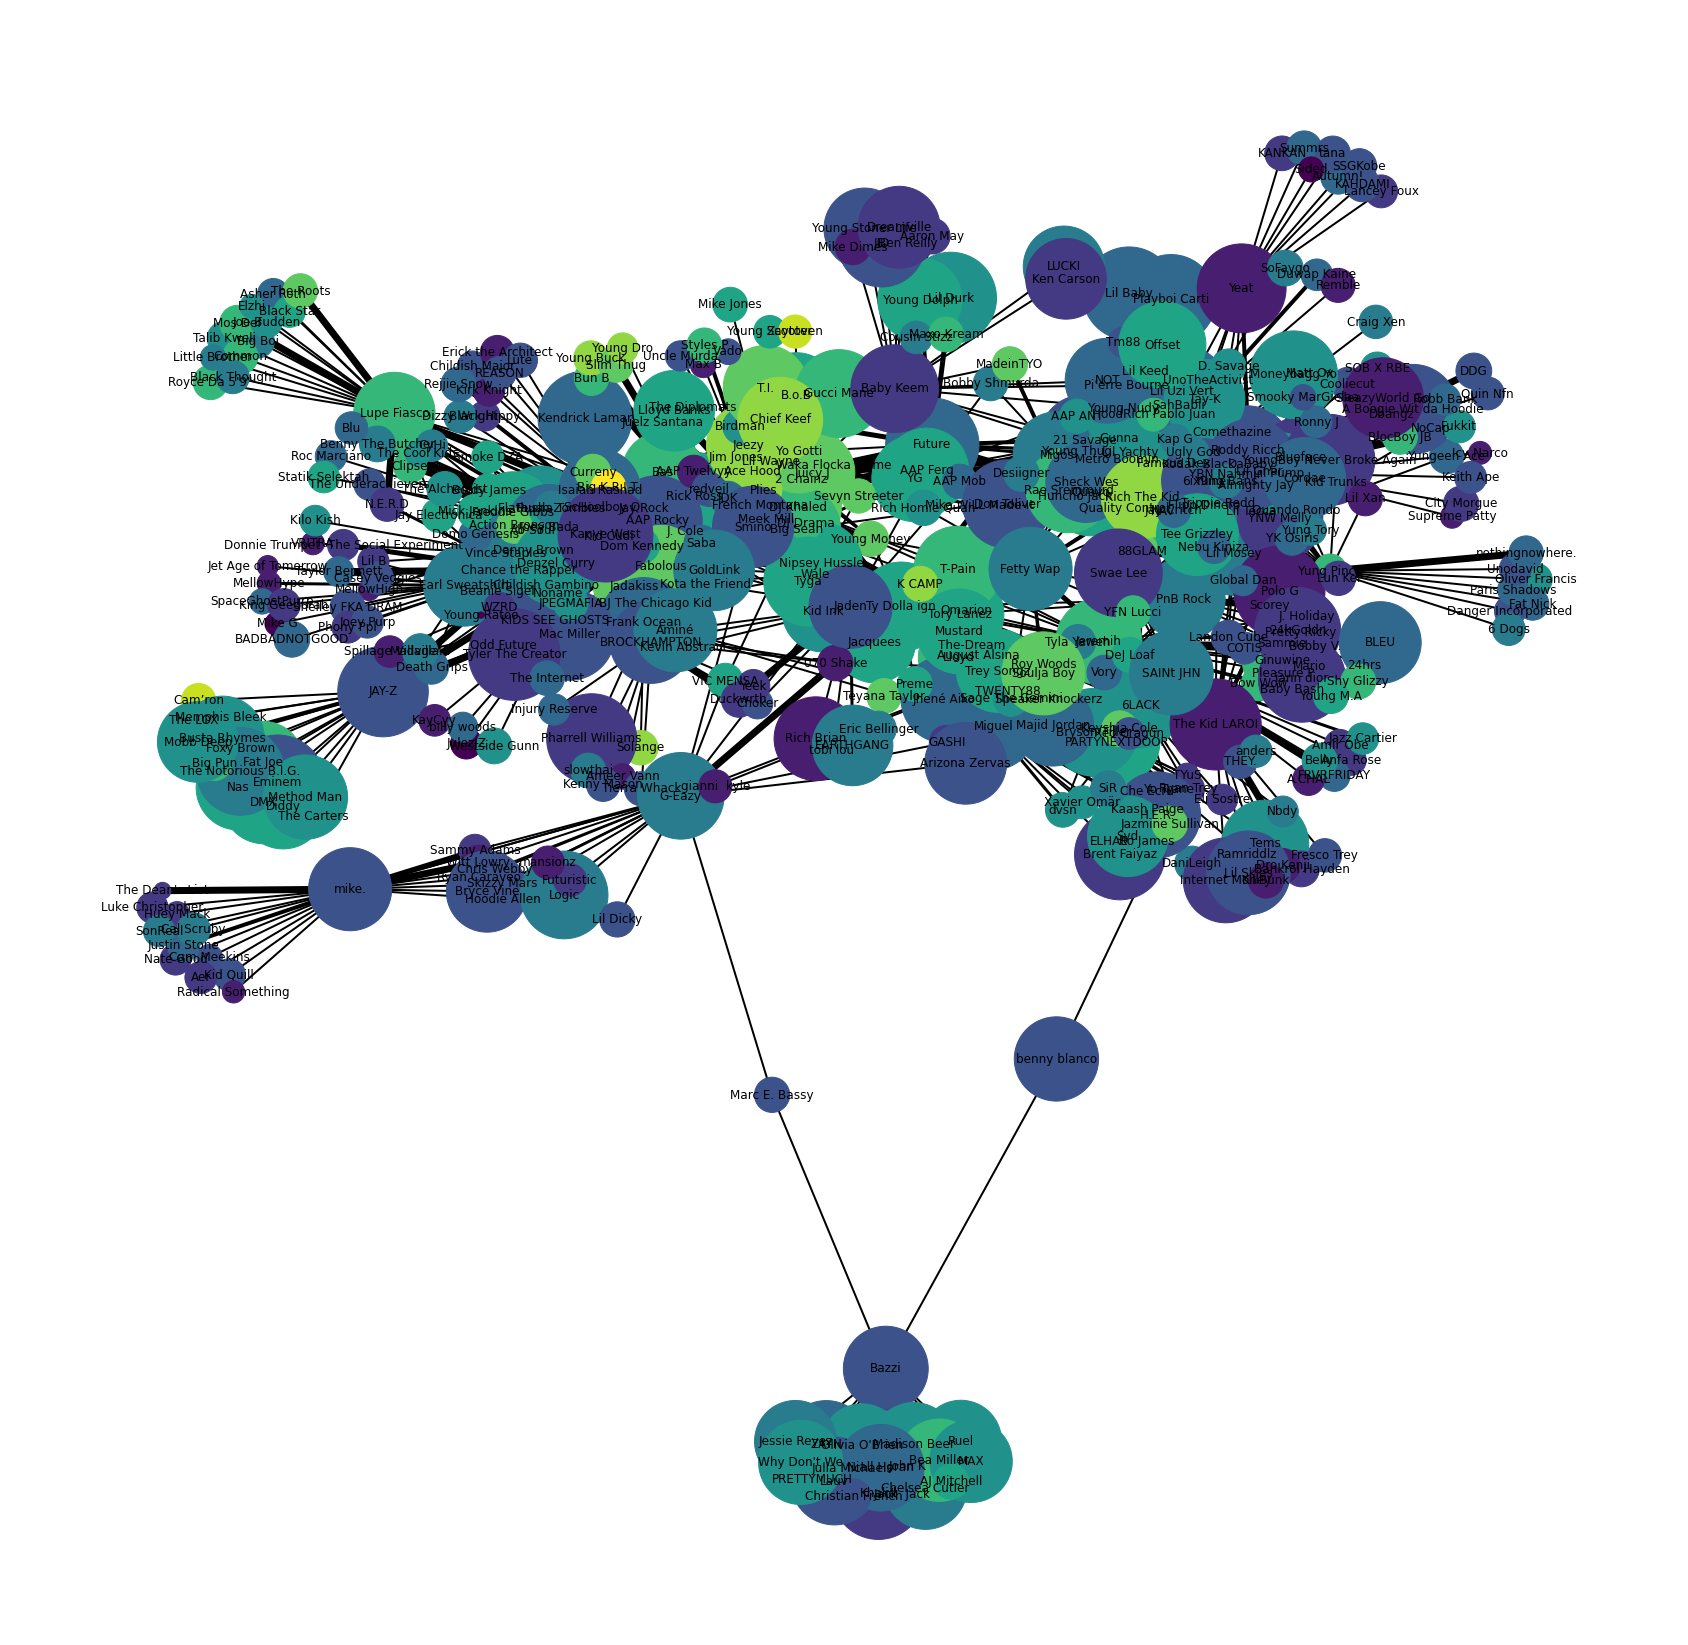

In [5]:
#build up the network 
G = nx.Graph() 

#Prepare node attributesm it make take a whike 
#use dictionary to retreive all artists songs 
Art = {}
keys1 = list(Nodes)
#add sub dictionary for each artist 
for i in keys1:
  Art[i] = {}
#add each artists songs to their dictionaries 
for key in keys1:
  for index, rows in dat2.iterrows():
    if rows.artist == key:
      Art[key][rows.song_name] = rows.song_info





#add node and weight
for i in range(len(Nodes)):
  G.add_node(Nodes[i], weight = Node_size[i], songs = Art[Nodes[i]],diversity = Node_color[i])
#add edge and weight 
G.add_edges_from(Edges)

#make edge weights more mutual 
for i in range(len(Edge_weights)):
  if Edge_weights[i] == 0:
    Edge_weights[i] = 2
  elif Edge_weights[i] == 1:
    Edge_weights[i] = 3
  elif Edge_weights[i] == 2:
    Edge_weights[i] = 4
  elif Edge_weights[i] == 3:
    Edge_weights[i] = 5
  elif Edge_weights[i] > 3:
    Edge_weights[i] = 7

fig, ax = plt.subplots(figsize=(30,30))

nx.draw(G,with_labels=True,node_size = Node_size,node_color =Node_color,width = Edge_weights)

In [6]:
#set colors for different classes of nodes 
set(Node_color)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}

In [7]:
Node_color = Node['node_color'].tolist()
#REPLACE the values manually 
for i in range(len(Node_color)):
    if Node_color[i] == 0:
        Node_color[i] = "#00FFFF"
    elif Node_color[i] == 1:
        Node_color[i] = '#7FFF00'
    elif Node_color[i] == 2:
        Node_color[i] = '#FF4040'
    elif Node_color[i] == 3:
        Node_color[i] = '#98F5FF'
    elif Node_color[i] == 4:
        Node_color[i] = '#FF6103'
    elif Node_color[i] == 5:
        Node_color[i] = '#CD1076'
    elif Node_color[i] == 6:
        Node_color[i] = '#EEDFCC'
    elif Node_color[i] == 7:
        Node_color[i] = '#7FFFD4'
    elif Node_color[i] == 8:
        Node_color[i] = '#B23AEE'
    elif Node_color[i] == 9:
        Node_color[i] = '#9BCD9B'
    elif Node_color[i] == 10:
        Node_color[i] = '#FFD700'
    elif Node_color[i] == 11:
        Node_color[i] = '#00BFFF'
    else:
        Node_color[i] = '#528B8B'

In [8]:
#try to make an interactive plots 
net = Network(notebook=True,height = '3500px',width = '100%',font_color = 'black')
#['size', 'value', 'title', 'x', 'y', 'label', 'color']
#make node size smaller 
Node_size = Node['node_size'].tolist()
Node_size = [i/34 for i in Node_size]

#create a node index 
net.add_nodes(Nodes,size = Node_size,label = Nodes,color = Node_color )

#add the edges now 
net.add_edges(iEdges)

net.repulsion(node_distance=700, spring_length=300)
net.show('int_net.html')